In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import norm, linregress
import seaborn as sb

In [2]:
# input the dataframe from csv (tmdb movies and credits)
csv_path_1 = "Resources/tmdb_5000_movies.csv"
csv_path_2 = "Resources/tmdb_5000_credits.csv"
df_movies = pd.read_csv(csv_path_1, low_memory=False)
df_credits = pd.read_csv(csv_path_2, low_memory=False)
df_total = pd.read_csv("Resources/merged.csv")
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
# def the function to simplify the file
# try to fill or creat the year_total dictionary
# if certain movie is in the dict just add the contain, else just creat one
def total_count(df, inside, total_dict: dict):
    if inside in total_dict.keys():
        total_dict[inside][0] += 1
        total_dict[inside][1] += df['revenue'][i] - df['budget'][i]
        total_dict[inside][2] += df['vote_average'][i] * df['vote_count'][i]
        total_dict[inside][3] += df['vote_count'][i]
    else:
        total_dict[inside] = [1, df['revenue'][i], 
                                    df['vote_average'][i] * df['vote_count'][i], 
                                    df['vote_count'][i]]
    total = total_dict
    return total
# make the dataframe by making and transpose with name changing
def convert_df(total, columns, index_sort, reset):
    df = pd.DataFrame(total)
    df = df.transpose()
    df = df.rename(columns = columns)
    if index_sort:
        df = df.sort_index()
    if reset:
        df = df.reset_index()
        df = df.drop(columns = 'index')
    return df

In [4]:
# missing list = [date, actor, genres, keyword]
missing_df = df_total.isna().sum().to_frame()
df_missing = missing_df.sort_values(by = 0, ascending = False)
df_missing[1] = df_missing[0].divide(len(df_movies.index))
df_missing = df_missing.rename(columns = {0: "missing number", 1: "missing percentage"})
df_missing = df_missing.drop(index = ['homepage', 'tagline', 'Unnamed: 0'])
df_missing

,missing number,missing percentage
crew,4,0.000833
overview,3,0.000625
runtime,2,0.000416
release_date,1,0.000208
popularity,0,0.000000
vote_average,0,0.000000
status,0,0.000000
spoken_languages,0,0.000000
revenue,0,0.000000
production_countries,0,0.000000


In [5]:
# time series analysis
# dictionary key is a string of year and content is a list with num, profit, rating, voting total
year_total = {}
period_total = {}
# in this loop, loop the whole dataframe by index
# try to split the data to a list so can isolate the year and month
# second loop converts the str here to int
# try to fill or creat the year_total dictionary
inflate = [25.4, 14.6, 18.7, 14.25, 9.57, 8.15, 4.77, 2.38, 1.68, 1.31, 1.08]
for i in df_movies.index:
    date = df_movies['release_date'][i]
    try:
        date_list = date.split('-')
    except:
        continue
    for j in range(3):
        date_list[j] = int(date_list[j])
    date_period = date_list[1]
    year = date_list[0] // 10
    df_movies['revenue'][i] *= inflate[year - 191]
    year_total = total_count(df_movies, year, year_total)
    period_total = total_count(df_movies, date_period, period_total)
# change the columns name
columns = {'index': 'years', 0: 'total_num', 1: 'average_revenue', 2: 'rating', 
           3: 'voting_total'}
# use middle of 10 years inflate to adjust (like 1910s use 1915 because before 1913 the data is not available)
# calculate average profit and average rate in the dictionary for year and month
for i in year_total.keys():
    year_total[i][1] = year_total[i][1] / year_total[i][0]
    year_total[i][2] = year_total[i][2] / year_total[i][3]
for i in period_total.keys():
    period_total[i][1] = period_total[i][1] / period_total[i][0] / 1000000
    period_total[i][2] = period_total[i][2] / period_total[i][3]
# make the dataframe by making and transpose with name changing
df_year = convert_df(year_total, columns, True, True)
df_year['years'] = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010]
# inflate adjustion
for i in range(11):
    df_year['average_revenue'][i] = df_year['average_revenue'][i] /1000000
df_period = convert_df(period_total, columns, True, False)
df_period['month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
# save in output as a csv
df_year.to_csv('Output/csv/year_collect.csv')
df_period.to_csv('Output/csv/month_collect.csv')
df_movies = pd.read_csv(csv_path_1, low_memory=False)
df_period.head()

c:\users\ningze sun\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\users\ningze sun\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,total_num,average_revenue,rating,voting_total,month
1,382.0,23.763630,6.241965,128480.0,1
2,326.0,53.823384,6.575646,183288.0,2
3,372.0,72.493855,6.611508,251744.0,3
4,350.0,70.083742,6.642147,218069.0,4
5,363.0,157.279002,6.794200,353405.0,5


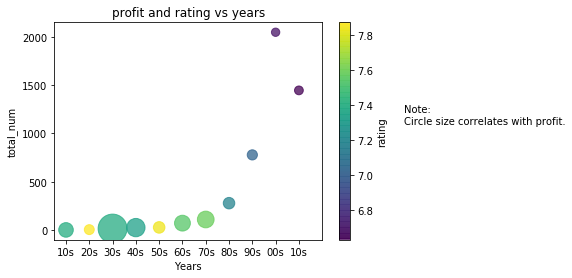

In [6]:
# year period figure making
# make a list for the size of circle set
average_revenue = df_year['average_revenue'].tolist()
# making the scatter sharex need to be set as false because of color setting (seems a bug?)
df_year.plot.scatter(x = 'years', y = 'total_num', s = average_revenue, 
                     c = 'rating', colormap='viridis', sharex=False, alpha = 0.75)
# text setting
plt.xlim(1905, 2020)
plt.title("profit and rating vs years")
plt.xlabel("Years")
plt.ylabel("total_num")
plt.xticks((1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010), 
           ('10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s', '00s', '10s'))
plt.text(2055, 1100, 'Note:\nCircle size correlates with profit.')
# figure saving
plt.savefig("Output/png/years_vs_revenueAndRating.png", bbox_inches = 'tight', dpi = 300)
plt.show()

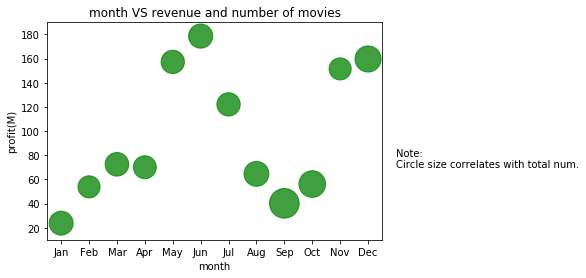

In [7]:
# month figure making similar as year period figure
rate_period = df_period['total_num'].tolist()
size = 1.5
for i in range(len(rate_period)):
    rate_period[i] = rate_period[i] * size
df_period.plot.scatter(x = 'month', y = 'average_revenue', c='green', s = rate_period, alpha = 0.75)
plt.xlim(0.5, 12.5)
plt.ylim(10, 190)
plt.title("month VS revenue and number of movies")
plt.xlabel("month")
plt.ylabel("profit(M)")
plt.xticks((1,2,3,4,5,6,7,8,9,10,11,12), 
           ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.text(13, 70, 'Note:\nCircle size correlates with total num.')
plt.savefig("Output/png/month_vs_revenueAndRating.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [8]:
# runtime vs revenue
# means = df_movies['revenue'].mean()
# df_good_movies = df_movies.loc[(df_movies['revenue'] > means * 10), :]
# df_good_movies.plot.scatter(x = 'runtime', y = 'revenue')
# plt.show()

In [9]:
# merge movie and credit csv file, it runs too slow so just make the dataframe 
# and create the new csv and just load them in future
# df_total = pd.merge(df_credits, df_movies, on = 'title')
# for i in range(1265):
#     name_init = 'Unnamed: '
#     try:
#         df_total = df_total.drop(columns = [name_init + str(i)])
#         print(name_initial + str(i))
#     except:
#         continue
# df_total.head()
# df_total.to_csv("Resources/merged.csv")

In [10]:
# actor dict making
# actor dictionary key is a string of actor and content is a list with num, revenue, rating, voting total

actor_dict = {}
# run the total dataframe by index
# try to use json to convert the str to a easier data like list or dict
# second loop run all actors in each rows of actor to creat the dict for all actors (similar as year and month)
for i in df_total.index:
    try:
        actor = json.loads(df_total['cast'][i])
        for j in actor:
            name = j['name']
            actor_dict = total_count(df_total, name, actor_dict)
    except:
        continue
# calculate the average rate. (because some movie revenues are too high, average profits are not a clear way to check)
for i in actor_dict.keys():
    if actor_dict[i][3] != 0:
        actor_dict[i][2] = actor_dict[i][2] / actor_dict[i][3]
#     actor_dict[i][1] = actor_dict[i][1] / actor_dict[i][0]
df_actor = convert_df(actor_dict, columns, False, False)
df_good_actor = df_actor.sort_values('total_num', ascending = False)
df_good_actor.to_csv("Output/csv/actor_collect.csv")
df_good_actor.head()

,total_num,average_revenue,rating,voting_total
Samuel L. Jackson,67.0,1.109007e+10,7.124912,139839.0
Robert De Niro,57.0,2.985704e+09,6.951648,49928.0
Bruce Willis,51.0,4.680148e+09,6.718977,72017.0
Matt Damon,47.0,4.733154e+09,7.239967,70876.0
Morgan Freeman,46.0,6.525978e+09,7.162936,101824.0


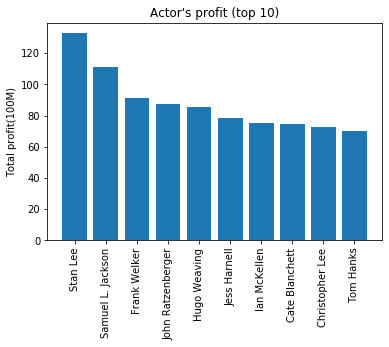

In [11]:
df_good1 = df_good_actor.sort_values('average_revenue', ascending = False).reset_index().head(n = 10)
df_good1['average_revenue'] = df_good1['average_revenue'].divide(100000000)
plt.bar(df_good1['index'], df_good1['average_revenue'])
plt.xticks(rotation = 'vertical')
plt.ylabel("Total profit(100M)")
plt.title("Actor's profit (top 10)")
plt.savefig("Output/png/actor's profit.png", bbox_inches = 'tight', dpi = 300)
plt.show()
# plt.title(genres_key[i])

In [12]:
# initial genres vs actor figure making
genres_dict = {}
# in here run the whole dataframe to isolate all the actors in each of genres_dict
# try to json the genres and actor
# run the genres in each row and add actors with the total_num profit rate and total vote in genres dict
for i in df_total.index:
    try:
        genres = json.loads(df_total['genres'][i])
        actor = json.loads(df_total['cast'][i])
        for j in genres:
            genres_name = j['name']
            for k in actor:
                actor_name = k['name']
                if actor_name == 'Stan Lee':
                    continue
                if genres_name in genres_dict.keys():
                    genres_dict[genres_name] = total_count(df_total, actor_name, genres_dict[genres_name])
                else:
                    genres_dict[genres_name] = {}
                    genres_dict[genres_name] = total_count(df_total, actor_name, genres_dict[genres_name])
    except:
        continue
# run loop to modify the total profit in G and rating
for i in genres_dict.keys():
    for j in genres_dict[i].keys():
        genres_dict[i][j][1] = genres_dict[i][j][1] / 100000000
        if genres_dict[i][j][3] != 0:
            genres_dict[i][j][2] = genres_dict[i][j][2] / genres_dict[i][j][3]

In [13]:
# final genres vs actor (sorting and modify) for figure dict making
genres_actor = {}
# find top 5 actors in each of the genres
# run the whole genres actors and take out their profit
# compare the actor's profit with the smallest profit in the temp if higher then changed it
# sort the temp to put the new actor into their correct position and combine to the final dict
for i in genres_dict.keys():
    temp = [(0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a')]
    for j in genres_dict[i]:
        temp_tuple = (genres_dict[i][j][1], j)
        if temp[4][0] < temp_tuple[0]:
            temp[4] = temp_tuple
        temp.sort(reverse = True)
    genres_actor[i] = temp
# use zip to rearrange the data to make the figures
for i in genres_actor.keys():
    genres_actor[i] = list(zip(genres_actor[i][0], genres_actor[i][1], 
                               genres_actor[i][2], genres_actor[i][3], genres_actor[i][4]))

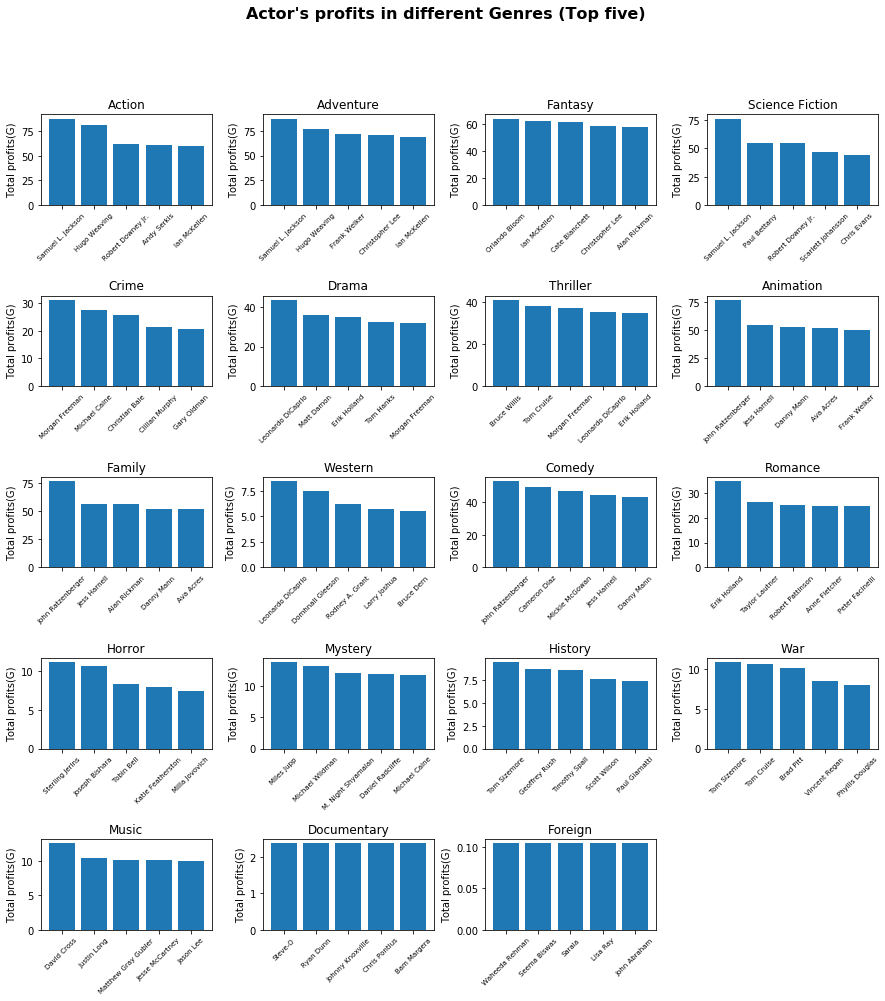

In [14]:
# Actor profit in different genres figure making
# make the subplot here in 4 * 5 figures
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16), 
      (ax17, ax18, ax19, ax20)) = plt.subplots(5, 4, sharex = False, sharey = False, figsize = (15,15))
# add suitable distances between each figures
plt.subplots_adjust(hspace = 1, wspace = 0.3)
# make a list for all subplot so can loop them
fig_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, 
            ax11, ax12, ax13, ax14, ax15, ax16, ax17, ax18, ax19, ax20]
# list the key of genres_actor for loop them
genres_key = list(genres_actor.keys())
# make the main title
fig.suptitle("Actor's profits in different Genres (Top five)", fontsize=16, fontweight="bold")
# use the loop to make the sub bar plot and rotate the y tick and make the subtitle and y label
for i in range(len(fig_list) - 1):
    fig_list[i].bar(genres_actor[genres_key[i]][1], genres_actor[genres_key[i]][0])
    fig_list[i].tick_params(axis = 'x', rotation = 45, labelsize = 7)
    fig_list[i].set_title(genres_key[i])
    fig_list[i].set_ylabel('Total profits(G)')
ax20.axis('off')
# save the image
plt.savefig("Output/png/Actor's_revenue_in_genres.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [15]:
# genres total combined data collection
genres_total = {}
# use the similar method  for genres total
for i in df_total.index:
    genres = json.loads(df_total['genres'][i])
    for j in genres:
        name = j['name']
        genres_total = total_count(df_total, name, genres_total)
for i in genres_total:
    genres_total[i][1] = genres_total[i][1] / genres_total[i][0] /1000000
    genres_total[i][2] = genres_total[i][2] / genres_total[i][3]
df_genres = convert_df(genres_total, columns, False, False)
df_genres = df_genres.sort_values('average_revenue', ascending = False)
df_genres['order'] = np.arange(20)
df_genres_reset = df_genres.reset_index()
df_genres_reset.to_csv("Output/csv/genres_collect.csv")

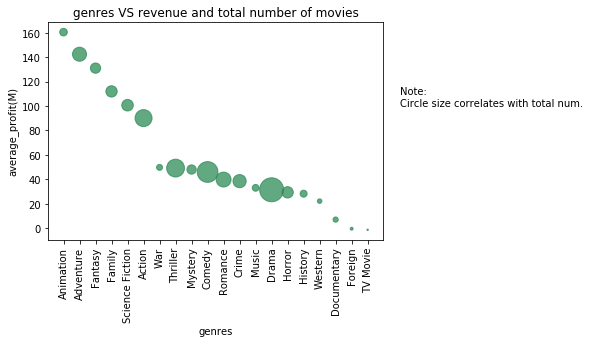

In [16]:
#genres VS revenue figure making
# similar method as period figure
rating_genres = df_genres['total_num'].tolist()
name_list = df_genres_reset['index'].tolist()
size = 0.25
for i in range(len(rating_genres)):
    rating_genres[i] = rating_genres[i] * size
df_genres.plot.scatter(x = 'order', y = 'average_revenue', s = rating_genres, 
                     c = 'seagreen', alpha = 0.75, rot = 90)
# plt.xlim(20, 3000)
# plt.ylim(20, 2400)
plt.title("genres VS revenue and total number of movies")
plt.xlabel("genres")
plt.ylabel("average_profit(M)")
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), 
           tuple(name_list))
plt.text(21, 100, 'Note:\nCircle size correlates with total num.')
plt.savefig("Output/png/genres_VS_revenueAndRating.png", bbox_inches = 'tight', dpi = 300)
plt.show()

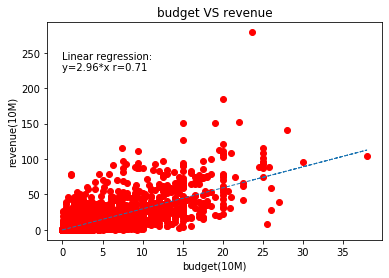

In [17]:
# budget vs revenue linear regression fig making
# remove all the N/A and 0 in budget and revenue
df_movies = df_movies.fillna(0)
df_nozero = df_movies.loc[df_movies['budget'] != 0,:]
df_nozero = df_nozero.loc[df_movies['revenue'] != 0, :]
# turn to 100M
df_nozero['budget(100M)'] = df_nozero['budget'].divide(10000000)
df_nozero['revenue(100M)'] = df_nozero['revenue'].divide(10000000)
# linear regression
(slope, intercept, lr_r, lr_p, lr_err) = linregress(df_nozero['budget(100M)'], df_nozero['revenue(100M)'])
fit = slope * df_nozero['budget(100M)'] + intercept
# fit and scatter the data
plt.scatter(x = df_nozero['budget(100M)'], y = df_nozero['revenue(100M)'], c = 'red')
plt.plot(df_nozero['budget(100M)'], fit, ls = '--', linewidth = 1)
plt.title("budget VS revenue")
plt.xlabel("budget(10M)")
plt.ylabel("revenue(10M)")
plt.text(0, 225, ('Linear regression:\ny={:.2f}*x r={:.2f}').format(slope, lr_r))
plt.savefig("Output/png/budget_VS_revenue.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [18]:
rating_dict = {}
for i in df_movies.index:
    rating = df_movies['vote_average'][i]
    if rating in rating_dict.keys():
        rating_dict[rating][0] += 1
        rating_dict[rating][1] += df_movies['vote_count'][i]
    else:
        rating_dict[rating] = [1, df_movies['vote_count'][i]]
df_rating = pd.DataFrame(rating_dict)
df_rating = df_rating.transpose()
df_rating = df_rating.rename(columns = {0: 'total_num', 1: 'voting_count'})
df_rating = df_rating.sort_index().reset_index().rename(columns = {'index': 'rating'})
df_rating = df_rating.drop([0])
df_rating.head()

,rating,total_num,voting_count
1,0.5,1,1
2,1.0,2,2
3,1.9,1,35
4,2.0,6,6
5,2.2,1,8


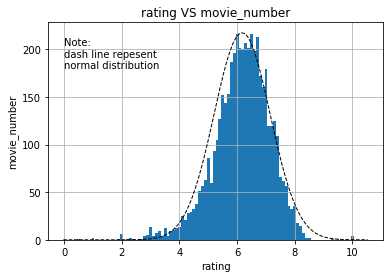

In [19]:
# making the rating and num of movie figure
rating_list = df_rating['rating'].tolist()
total_rating_list = df_rating['total_num'].tolist()
df_no_zero = df_movies.loc[(df_movies['vote_average'] != 0),:]
data = df_no_zero['vote_average'].tolist()
# fitting the normal distribution
mean, std = norm.fit(data)
# plot the fig
plt.bar(rating_list, total_rating_list, linewidth = 0,
        width = 0.1, align = 'center')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std) * 530
plt.plot(x, p, 'k', linewidth=1, ls = '--')
plt.title('rating VS movie_number')
plt.xlabel("rating")
plt.ylabel("movie_number")
plt.text(0, 180, 'Note:\ndash line repesent\nnormal distribution')
plt.grid()
plt.savefig("Output/png/rating_VS_movieNum.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [20]:
# making the data for keyword similar as actor genres so not comment so much
keyword_list = []
# keyword_genres = {'genres': [{'keyword': [num, revenue, vote_average, vote_count]}]}
keyword_genres = {}
for i in df_total.index:
    keyword = json.loads(df_total['keywords'][i])
    genres = json.loads(df_total['genres'][i])
    for j in keyword:
        keyword_list.append(j['name'])
    for j in genres:
        genres_name = j['name']
        for k in keyword:
            keyword_name = k['name']
            if genres_name in keyword_genres.keys():
                keyword_genres[genres_name] = total_count(df_total, keyword_name, keyword_genres[genres_name])
            else:
                keyword_genres[genres_name] = {}
                keyword_genres[genres_name] = total_count(df_total, keyword_name, keyword_genres[genres_name])
for i in keyword_genres.keys():
    for j in keyword_genres[i].keys():
        keyword_genres[i][j][1] = keyword_genres[i][j][1] / 1000000000
        if keyword_genres[i][j][3] != 0:
            keyword_genres[i][j][2] = keyword_genres[i][j][2] / keyword_genres[i][j][3]
keyword_top = {}
for i in keyword_genres.keys():
    temp = [(0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a')]
    for j in keyword_genres[i]:
        temp_tuple = (keyword_genres[i][j][1], j)
        if temp[9][0] < temp_tuple[0]:
            temp[9] = temp_tuple
        temp.sort(reverse = True)
    keyword_top[i] = temp
for i in keyword_top.keys():
    keyword_top[i] = list(zip(keyword_top[i][0], keyword_top[i][1], keyword_top[i][2], keyword_top[i][3], 
                              keyword_top[i][5], keyword_top[i][6], keyword_top[i][7], keyword_top[i][8],
                              keyword_top[i][9]
                             ))

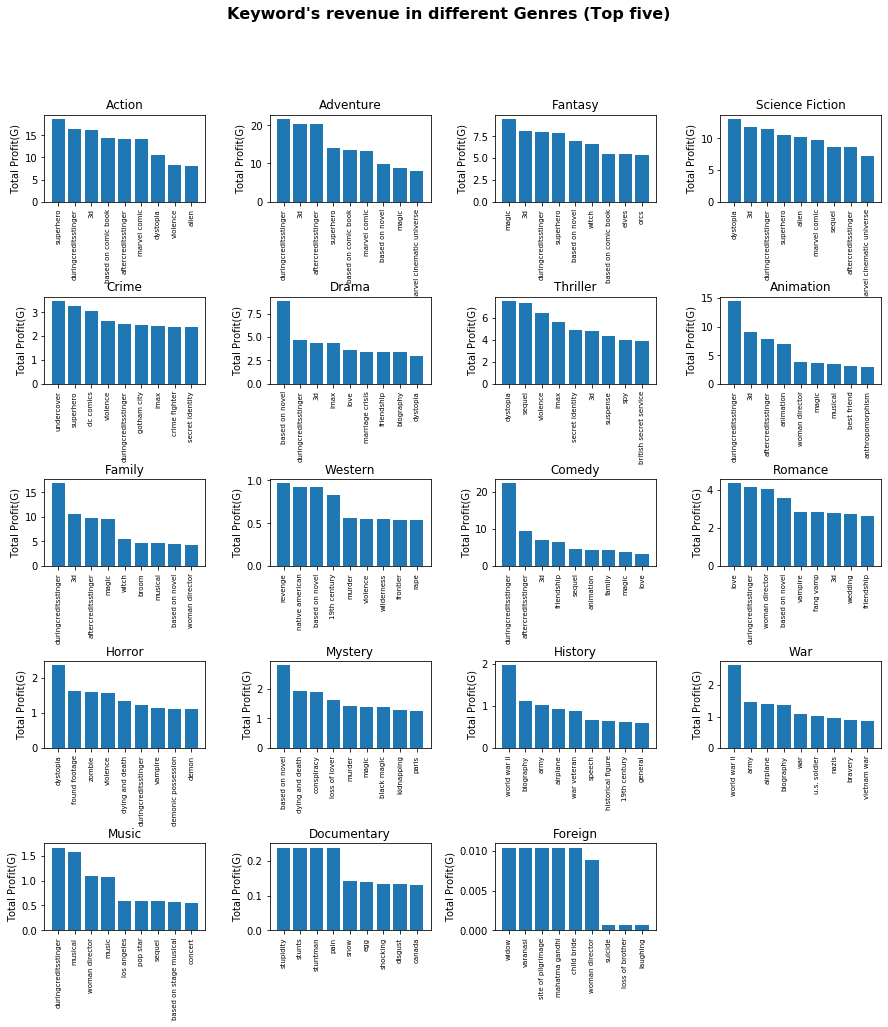

In [21]:
# similar to actor genres not comment
fig, ((axs1, axs2, axs3, axs4), (axs5, axs6, axs7, axs8), (axs9, axs10, axs11, axs12), (axs13, axs14, axs15, axs16), 
      (axs17, axs18, axs19, axs20)) = plt.subplots(5, 4, sharex = False, sharey = False, figsize = (15,15))
plt.subplots_adjust(hspace = 1.1, wspace = 0.4)
fig_list1 = [axs1, axs2, axs3, axs4, axs5, axs6, axs7, axs8, axs9, axs10, 
            axs11, axs12, axs13, axs14, axs15, axs16, axs17, axs18, axs19, axs20]
keyword_key = list(keyword_top.keys())
fig.suptitle("Keyword's revenue in different Genres (Top five)", fontsize=16, fontweight="bold")
for i in range(len(fig_list1) - 1):
    fig_list1[i].bar(keyword_top[keyword_key[i]][1], keyword_top[keyword_key[i]][0])
    fig_list1[i].tick_params(axis = 'x', rotation = 90, labelsize = 7)
    fig_list1[i].set_title(keyword_key[i])
    fig_list1[i].set_ylabel('Total Profit(G)')
axs20.axis('off')
plt.savefig("Output/png/keyword's_revenue_in_genres.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [22]:
# # wordcloud making fig for keyword list
# wordcloud = WordCloud().generate("".join(keyword_list))
# # Display the generated image:
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.savefig("Output/png/keyword_wordcloud.png", bbox_inches = 'tight', dpi = 300)
# plt.show()

In [23]:
# making the total num of keyword and actor for each movie
total_actor_dict = {}
total_keyword_dict = {}
for i in df_total.index:
    total_actor = 0
    total_keyword = 0
    try:
        actor = json.loads(df_total['cast'][i])
        keyword = json.loads(df_total['keywords'][i])
        for j in actor:
            total_actor += 1
        id = df_total['id'][i]
        total_actor_dict[id] = total_actor
        for j in keyword:
            total_keyword += 1
        total_keyword_dict[id] = total_keyword
    except:
        continue
df_movies['num_actor'] = df_movies['id'].map(total_actor_dict)
df_movies['num_keywords'] = df_movies['id'].map(total_keyword_dict)

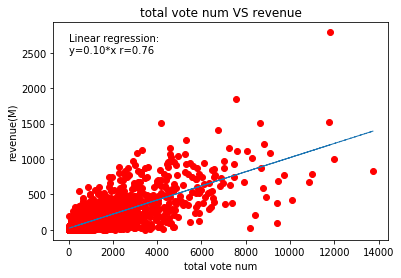

In [24]:
# making the budget vs revenue fig similar as budget vs revenue
df_nozero_1 = df_movies.loc[df_movies['vote_count'] != 0,:]
df_nozero_1 = df_nozero.loc[df_movies['revenue'] != 0, :]
df_nozero_1['revenue(M)'] = df_nozero_1['revenue'].divide(1000000)
(slope, intercept, lr_r, lr_p, lr_err) = linregress(df_nozero_1['vote_count'], df_nozero_1['revenue(M)'])
fit = slope * df_nozero_1['vote_count'] + intercept
plt.scatter(x = df_nozero_1['vote_count'], y = df_nozero_1['revenue(M)'], c = 'red')
plt.plot(df_nozero_1['vote_count'], fit, ls = '--', linewidth = 1)
plt.title("total vote num VS revenue")
plt.xlabel("total vote num")
plt.ylabel("revenue(M)")
plt.text(15, 2500, ('Linear regression:\ny={:.2f}*x r={:.2f}').format(slope, lr_r))
plt.savefig("Output/png/total_vote_VS_revenue.png", bbox_inches = 'tight', dpi = 300)
plt.show()

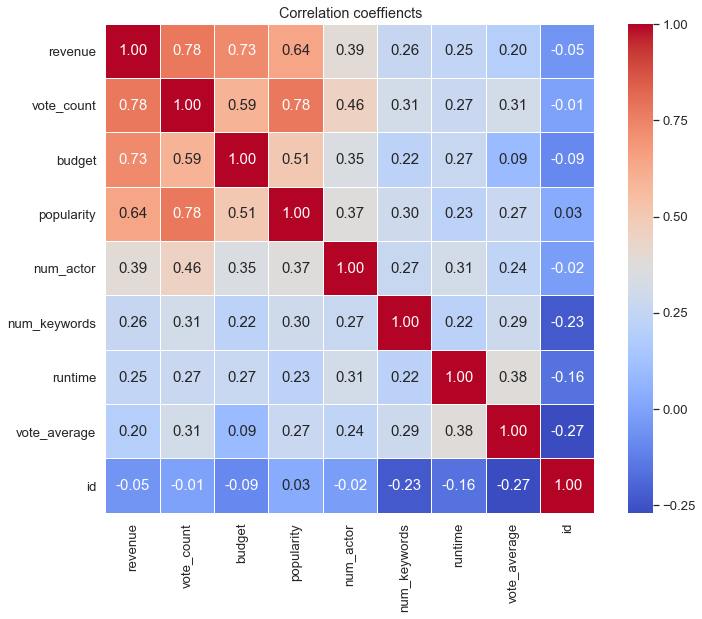

In [25]:
# correlation first as initial
cor_format = df_movies.corr()
# sort correlation around revenue
# here is a bug for plt so there is a cutoff and use ylim to fit it 
# but the order is different so use smallest and invert_xaxis to fix this bug
col_name = cor_format.nsmallest(18, 'revenue')['revenue'].index
# use np to make the list for the correlation
cor_num = np.corrcoef(df_movies[col_name].dropna(how = 'any').values.T)
# making the figures
plt.figure(figsize = (12,9))
sb.set(font_scale = 1.2)
ax = sb.heatmap(cor_num, cbar = True, annot = True, square = True, fmt = '.2f', 
                annot_kws = {'size': 15}, linewidth = 0.1, cmap = 'coolwarm',
                yticklabels = col_name.values, xticklabels = col_name.values)
plt.title("Correlation coeffiencts")
ax.invert_xaxis()
plt.ylim(0,len(cor_num))
plt.savefig("Output/png/correlation_heatmap.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [26]:
director_dict = {}
for i in df_total.index:
    try:
        director = json.loads(df_total['crew'][i])
        for j in director:
            if j['job'] == 'Director':
                name = j['name']
                director_dict = total_count(df_total, name, director_dict)
    except:
        continue
for i in director_dict.keys():
    if director_dict[i][3] != 0:
        director_dict[i][2] = director_dict[i][2] / director_dict[i][3]
#     actor_dict[i][1] = actor_dict[i][1] / actor_dict[i][0]
df_director = convert_df(director_dict, columns, False, False)
df_good_director = df_director.sort_values('average_revenue', ascending = False)
df_good_director.to_csv("Output/csv/director_collect.csv")
df_good_director.head()

,total_num,average_revenue,rating,voting_total
Steven Spielberg,27.0,7.664893e+09,7.225633,59771.0
Peter Jackson,9.0,5.455643e+09,7.590605,45533.0
James Cameron,7.0,5.373669e+09,7.378455,32819.0
Michael Bay,12.0,4.572525e+09,6.328244,26845.0
Christopher Nolan,8.0,3.472483e+09,7.945184,62653.0


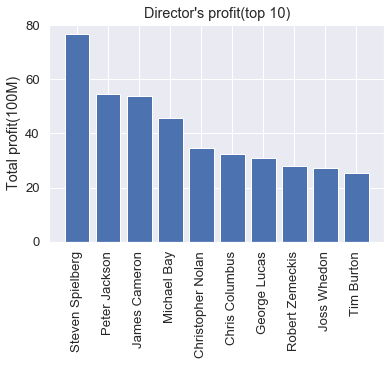

In [27]:
df_good2 = df_good_director.sort_values('average_revenue', ascending = False).reset_index().head(n = 10)
df_good2['average_revenue'] = df_good2['average_revenue'].divide(100000000)
plt.bar(df_good2['index'], df_good2['average_revenue'])
plt.xticks(rotation = 'vertical')
plt.ylabel("Total profit(100M)")
plt.title("Director's profit(top 10)")
plt.savefig("Output/png/director_profit.png", bbox_inches = 'tight', dpi = 300)
plt.show()

In [28]:
# initial genres vs actor figure making
genres_dir = {}
# in here run the whole dataframe to isolate all the actors in each of genres_dict
# try to json the genres and actor
# run the genres in each row and add actors with the total_num profit rate and total vote in genres dict
for i in df_total.index:
    try:
        genres = json.loads(df_total['genres'][i])
        director = json.loads(df_total['crew'][i])
        for j in genres:
            genres_name = j['name']
            for k in director:
                if k['job'] == 'Director':
                    actor_name = k['name']
#                     if actor_name == 'Stan Lee':
#                         continue
                    if genres_name in genres_dir.keys():
                        genres_dir[genres_name] = total_count(df_total, actor_name, genres_dir[genres_name])
                    else:
                        genres_dir[genres_name] = {}
                        genres_dir[genres_name] = total_count(df_total, actor_name, genres_dir[genres_name])
    except:
        continue
# run loop to modify the total profit in G and rating
for i in genres_dir.keys():
    for j in genres_dir[i].keys():
        genres_dir[i][j][1] = genres_dir[i][j][1] / 100000000
        if genres_dir[i][j][3] != 0:
            genres_dir[i][j][2] = genres_dir[i][j][2] / genres_dir[i][j][3]

In [29]:
# final genres vs actor (sorting and modify) for figure dict making
genres_dir_sort = {}
# find top 5 actors in each of the genres
# run the whole genres actors and take out their profit
# compare the actor's profit with the smallest profit in the temp if higher then changed it
# sort the temp to put the new actor into their correct position and combine to the final dict
for i in genres_dir.keys():
    temp = [(0,'a'), (0,'a'), (0,'a'), (0,'a'), (0,'a')]
    for j in genres_dir[i]:
        temp_tuple = (genres_dir[i][j][1], j)
        if temp[4][0] < temp_tuple[0]:
            temp[4] = temp_tuple
        temp.sort(reverse = True)
    genres_dir_sort[i] = temp
# use zip to rearrange the data to make the figures
for i in genres_dir_sort.keys():
    genres_dir_sort[i] = list(zip(genres_dir_sort[i][0], genres_dir_sort[i][1], 
                               genres_dir_sort[i][2], genres_dir_sort[i][3], genres_dir_sort[i][4]))

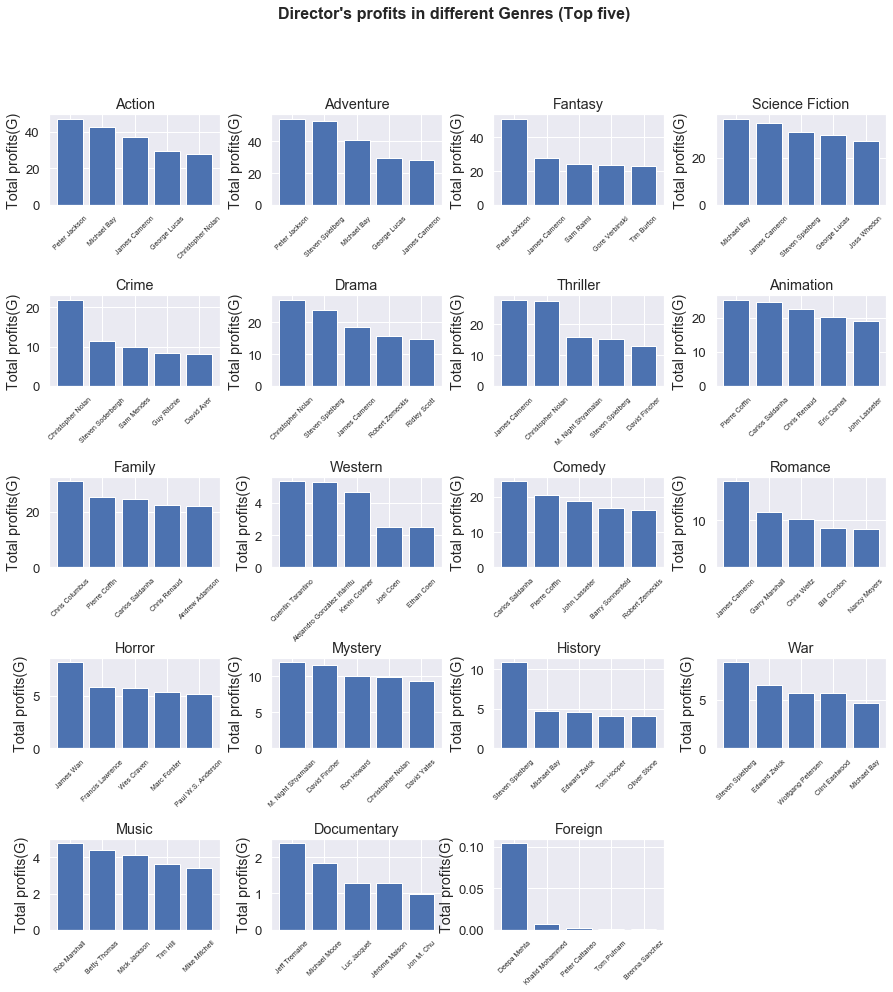

In [30]:
# Actor profit in different genres figure making
# make the subplot here in 4 * 5 figures
fig, ((axl1, axl2, axl3, axl4), (axl5, axl6, axl7, axl8), (axl9, axl10, axl11, axl12), (axl13, axl14, axl15, axl16), 
      (axl17, axl18, axl19, axl20)) = plt.subplots(5, 4, sharex = False, sharey = False, figsize = (15,15))
# add suitable distances between each figures
plt.subplots_adjust(hspace = 1, wspace = 0.3)
# make a list for all subplot so can loop them
fig_list = [axl1, axl2, axl3, axl4, axl5, axl6, axl7, axl8, axl9, axl10, 
            axl11, axl12, axl13, axl14, axl15, axl16, axl17, axl18, axl19, axl20]
# list the key of genres_actor for loop them
genres_key = list(genres_dir_sort.keys())
# make the main title
fig.suptitle("Director's profits in different Genres (Top five)", fontsize=16, fontweight="bold")
# use the loop to make the sub bar plot and rotate the y tick and make the subtitle and y label
for i in range(len(fig_list) - 1):
    fig_list[i].bar(genres_dir_sort[genres_key[i]][1], genres_dir_sort[genres_key[i]][0])
    fig_list[i].tick_params(axis = 'x', rotation = 45, labelsize = 7)
    fig_list[i].set_title(genres_key[i])
    fig_list[i].set_ylabel('Total profits(G)')
axl20.axis('off')
# save the image
plt.savefig("Output/png/Director's_revenue_in_genres.png", bbox_inches = 'tight', dpi = 300)
plt.show()